## Linear Regression using the Machine Learning Approach

In [1]:
#import required libraries 

import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from pandas.core.common import random_state 

#Needed for explanatory regression model 
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [2]:
#import necessities from sklearn needed for predictive regression model 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error 


In [3]:
#import the dataset 
df = pd.read_csv('/content/MyCreditData (3).csv')

In [4]:
#check data 
df.head()

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,other_debtors,present_residence,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,gender,profit
0,3,18,0,2,1049,4,2,2,2,3,...,21,1,0,0,1,0,0,0,female,242
1,3,9,0,5,2799,4,0,1,2,0,...,36,1,0,1,1,1,0,0,male,596
2,0,12,4,8,841,0,1,1,2,3,...,23,1,0,0,3,0,0,0,female,25
3,3,12,0,5,2122,4,0,0,2,0,...,39,1,0,1,3,1,0,1,male,568
4,3,12,0,5,2171,4,0,2,2,3,...,38,0,2,1,3,0,0,1,male,782


In [5]:
#dimensions 
df.shape

(1000, 21)

In [6]:
#descriptive stats
df.describe() 

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.342000,20.903000,2.513000,4.100000,3271.24800,2.865000,1.525000,1.591000,1.866000,1.648000,1.386000,35.54200,0.908000,1.535000,0.407000,1.274000,0.155000,0.404000,0.037000,-18.844000
std,1.145578,12.058814,1.780169,2.090064,2822.75176,1.519567,1.344315,0.910246,0.445244,1.292969,1.210979,11.35267,0.421561,0.779347,0.577654,0.946478,0.362086,0.490943,0.188856,1215.455773
min,0.000000,4.000000,0.000000,0.000000,250.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8130.000000
25%,0.000000,12.000000,0.000000,2.000000,1365.50000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,27.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-184.750000
50%,1.000000,18.000000,4.000000,4.000000,2319.50000,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,33.00000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,206.000000
75%,3.000000,24.000000,4.000000,5.000000,3972.25000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,42.00000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,472.500000
max,3.000000,72.000000,4.000000,9.000000,18424.00000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,75.00000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,4826.000000


In [7]:
#check variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   int64 
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   int64 
 3   purpose                  1000 non-null   int64 
 4   amount                   1000 non-null   int64 
 5   savings_account          1000 non-null   int64 
 6   employment_duration      1000 non-null   int64 
 7   installment_rate         1000 non-null   int64 
 8   other_debtors            1000 non-null   int64 
 9   present_residence        1000 non-null   int64 
 10  property                 1000 non-null   int64 
 11  age                      1000 non-null   int64 
 12  other_installment_plans  1000 non-null   int64 
 13  housing                  1000 non-null   int64 
 14  number_credits           1000 non-null   

Text(0.5, 1.0, 'Heat Map of Nulls')

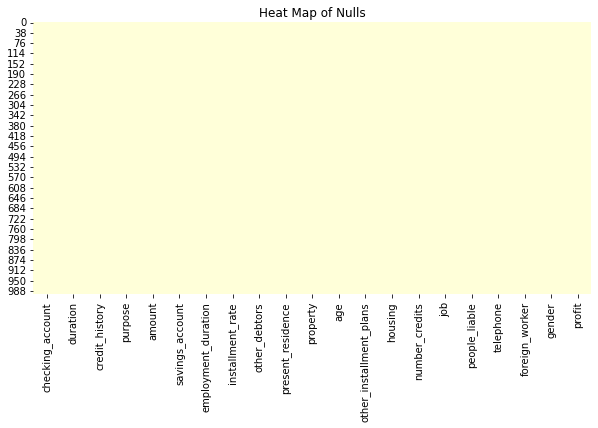

In [8]:
#check for null values

plt.figure(figsize=(10,5))
p = sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
p.set_title("Heat Map of Nulls")





In [9]:
#count nulls for each column 
df.isnull().sum() 

checking_account           0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings_account            0
employment_duration        0
installment_rate           0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
gender                     0
profit                     0
dtype: int64

#Take a look at the data

In [10]:
#Visualize example 

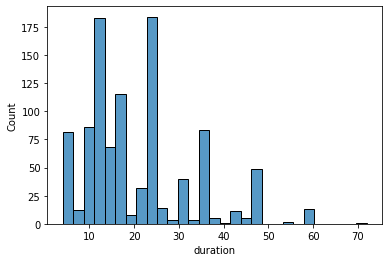

In [11]:
#create histogram 
sns.histplot(x="duration", data=df)

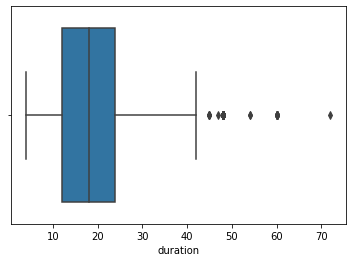

In [12]:
#create boxplot 
sns.boxplot(x="duration", data=df)

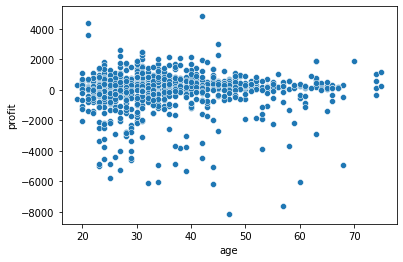

In [13]:
#scatter plot 
sns.scatterplot(x="age", y="profit", data=df)

In [14]:
##Ensure categorical variables are not continuous 
not_categories = ['duration', 'amount', 'age', 'profit']
for column in df.columns: 
  if column not in not_categories:
    df[column] = pd.Categorical(df[column])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account         1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_duration      1000 non-null   category
 7   installment_rate         1000 non-null   category
 8   other_debtors            1000 non-null   category
 9   present_residence        1000 non-null   category
 10  property                 1000 non-null   category
 11  age                      1000 non-null   int64   
 12  other_installment_plans  1000 non-null   category
 13  housing                  1000 non-null   category
 14  number_cr

##Train and Test Set 


In [16]:

#split the data (don't scale the data yet)
y = df['profit']
X = df.iloc[: , :-1]

#Create dummy variables 
X = pd.get_dummies(X, drop_first=True)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [17]:
#Check the dimension 
X_train.shape

(700, 53)

In [18]:
X_val.shape

(300, 53)

##Ordinary Least Squares Regression Model 

In [19]:
#create a linear model with output 
ols_model = sm.OLS(y, sm.add_constant(X))
ols_model.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5.765
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           3.82e-31
Time:                        15:59:44   Log-Likelihood:                -8381.4
No. Observations:                1000   AIC:                         1.687e+04
Df Residuals:                     946   BIC:                         1.714e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          215.3552    450.307      0.478      0.633    -668.362    1099.072
duration                         7.6577      4.099      1.868      0.062      -0.386      15.702
amount                          -0.1743      0.019     -8.949      0.000      -0.213      -0.136
age                             -2.2730      3.691     -0.616      0.538      -9.516       4.970
checking_account_1             334.1024     92.245      3.622      0.000     153.075     515.130
checking_account_2             180.6118    157.947      1.143      0.253    -129.356     490.579
checking_account_3             -78.6215    100.160     -0.785      0.433    -275.182     117.939
credit_history_1              -482.0716    194.936     -2.473      0.014    -864.628     -99.515
credit_history_2              -557.9443    196.050     -2.846      0.005    -942.688    -173.200
credit_history_3               154.5074    140.062      1.103      0.270    -120.361     429.376
credit_history_4              -358.6789    104.113     -3.445      0.001    -562.998    -154.360
purpose_1                      688.1936    350.755      1.962      0.050      -0.154    1376.541
purpose_2                      305.2037    348.832      0.875      0.382    -379.371     989.778
purpose_3                      182.2755    412.807      0.442      0.659    -627.849     992.400
purpose_4                      258.4591    346.386      0.746      0.456    -421.314     938.232
purpose_5                      107.2052    343.934      0.312      0.755    -567.757     782.167
purpose_6                      202.4487    469.013      0.432      0.666    -717.978    1122.876
purpose_7                      -10.6803    374.045     -0.029      0.977    -744.733     723.373
purpose_8                      139.9877    354.214      0.395      0.693    -555.149     835.124
purpose_9                      226.8195    504.920      0.449      0.653    -764.074    1217.713
savings_account_1              311.7529    139.348      2.237      0.026      38.286     585.220
savings_account_2             -135.7081    179.543     -0.756      0.450    -488.057     216.641
savings_account_3              171.4836    195.958      0.875      0.382    -213.079     556.046
savings_account_4             -100.3759    121.634     -0.825      0.409    -339.079     138.327
employment_duration_1          195.5724    106.459      1.837      0.067     -13.350     404.495
employment_duration_2           56.4537    109.424      0.516      0.606    -158.287     271.195
employment_duration_3           -2.5666    103.384     -0.025      0.980    -205.455     200.322
employment_duration_4          199.7527    181.421      1.101      0.271    -156.281     555.786
installment_rate_1             159.5304    115.564      1.380      0.168    

##Train and Test for next models

In [20]:
#split the data 
y = df['profit']
X = df.iloc[: , :-1]

#Create dummy variables 
X = pd.get_dummies(X, drop_first=True)

#scale the data 
scaler = StandardScaler() 
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1)

##Regularization with Lasso and Ridge 

##We will use the Root Mean Square Error as our performance metric.

#The regression model formula is given by 

##$$Y_i = β_o + β_1X_{i1} + \beta_2X_{i2} +...\beta_{p-1}X_{i,p-1} + ϵ_i $$

#If we substract, we can get 

## $$  \epsilon_i = Y_i -  (β_o + β_1X_{i1} + \beta_2X_{i2} +...\beta_{p-1}X_{i,p-1})$$

## so that  $$\epsilon_i = Y_i - (\beta_0 + \sum_{j=1}^{p-1} \beta_jX_{ij})$$

#We can replace the the summation with 

##$$\epsilon_i = Y_i -  \hat{Y_i}$$

## upon squaring, we get the sum of the squared errors (often referred to as the resdiual sum of squares or $SS_R$

##$$\sum_{i=1}^n (Y_i -  \hat{Y_i})^2$$

We seek to minimize the loss function, given by 

## $$Loss = \frac{\sum_{i=1}^n (Y_i -  \hat{Y_i})^2}{n}$$

##From this, we get the root mean square error, RMSE 

## $$RMSE = \sqrt{\frac{\sum_{i=1}^n (Y_i -  \hat{Y_i})^2}{n}}$$



In [21]:
#Create a function for RMSE 

def RMSE(y_train, y_pred):
  return np.sqrt(mean_squared_error(y_train, y_pred))


#Lasso 
Lasso regression is great for feature selection and to prevent overfitting 

## $$Loss =  ∑_{i=1}^{n}(y_i - \hat{y_i})^2 + λ∑_{j=1}^{p}|β_j|$$

In [22]:
##Lasso 
alphas = np.arange(.01, 60, 0.5)
lasso_model = LassoCV(alphas = alphas, cv=5, max_iter=5e4)

lasso_model.fit(X_train, y_train)

print('alpha: %f' % lasso_model.alpha_)



alpha: 45.510000


In [23]:
lasso_best = Lasso(alpha = lasso_model.alpha_)
lasso_best.fit(X_train, y_train)




Lasso(alpha=45.51)

##Ridge 

Ridge regression is good to help prevent overfitting, but not as good as Lasso at feature selection 

##$$ Loss=  ∑_{i=1}^{n}(y_i - \hat{y_i})^2 + λ∑_{j=1}^{p}{β_j}^2$$

In [24]:
#Ridge 

In [25]:
 #Generate our model with best hyperparameter 

alpha = np.arange(.01, 400, 2)
ridge_model = RidgeCV(alphas = alpha, cv = 5)

#fit the model 
ridge_model.fit(X_train, y_train)

print('alpha : %f' % ridge_model.alpha_)



alpha : 298.010000


In [26]:
#Generate the best 

ridge_best = Ridge(alpha=ridge_model.alpha_)
ridge_best.fit(X_train, y_train) 

Ridge(alpha=298.00999999999993)

In [27]:
#Generate no-penalty model 

ols_no_penatly = LinearRegression().fit(X_train, y_train)

##Compare Models 

In [28]:
##Create RMSE for train and val

#OLS Model 
ols_train_model = round(RMSE(y_train, ols_no_penatly.predict(X_train)),2)
ols_val_model = round(RMSE(y_val, ols_no_penatly.predict(X_val)),2)


#Lasso Model 
lasso_train_model = round(RMSE(y_train, lasso_best.predict(X_train)),2)
lasso_val_model = round(RMSE(y_val, lasso_best.predict(X_val)),2)


#Ridge Model 
ridge_train_model = round(RMSE(y_train, ridge_best.predict(X_train)),2)
ridge_val_model = round(RMSE(y_val, ridge_best.predict(X_val)),2)





In [29]:
#print df for RMSE 
pd.DataFrame([[ols_train_model, ols_val_model], [lasso_train_model, lasso_val_model], [ridge_train_model, ridge_val_model]], 
             columns = ["RMSE Train", "RMSE Val"], index= ["OLS", "Lasso", "Ridge"])

,RMSE Train,RMSE Val
OLS,1037.37,1137.87
Lasso,1073.47,1130.17
Ridge,1062.56,1136.92



Citations

Some of the ideas and code snippets were borrowed from:
Dr. Bjarnadóttir, October 12, 2022, "Linear Regression in a Predictive Setting" & "Model Selection", Pyton, .ipynb, https://www.rhsmith.umd.edu/directory/margret-bjarnadottir
